In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
TRAIN_FILE = '/content/drive/MyDrive/ML_Assignment_2/train.csv'
TEST_FILE = '/content/drive/MyDrive/ML_Assignment_2/test.csv'

# TRAIN PREPROCESSING

In [ ]:
census_df = pd.read_csv(TRAIN_FILE);

In [ ]:
census_df.head()

,age,Working Section,Financial Weight,education,education-num,Marriage Status,occupation,Relationship Status,Skin Color,Gender,Capital Gain,Capital Loss,hours-per-week,Country,id,Predictions
0,48,Private,138970,Bachelors,13,Married Civilian,Exec-managerial,Husband,White,Male,0,0,45,United-States,6900,Rich
1,21,State Govenment,96483,Some-college,10,No Marriage,Adm-clerical,Own-child,Asian-Pac-Islander,Female,0,0,12,United-States,27355,Poor
2,49,Private,228583,HS-grad,9,Divorced,Other-service,Unmarried,White,Male,0,0,40,Columbia,12701,Poor
3,40,Private,130760,Assoc-voc,11,Married Civilian,Exec-managerial,Husband,White,Male,0,0,50,United-States,782,Rich
4,55,Local Government,223716,Some-college,10,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,40,United-States,20462,Poor


In [ ]:
census_df.isna().sum()

age                    0
Working Section        0
Financial Weight       0
education              0
education-num          0
Marriage Status        0
occupation             0
Relationship Status    0
Skin Color             0
Gender                 0
Capital Gain           0
Capital Loss           0
hours-per-week         0
Country                0
id                     0
Predictions            0
dtype: int64

In [ ]:
census_df['Country'].value_counts()

United-States                 20382
Mexico                          465
?                               413
Philippines                     134
Germany                          92
Puerto-Rico                      88
Canada                           85
El-Salvador                      81
Cuba                             73
India                            66
England                          59
Jamaica                          59
Dominican-Republic               57
Vietnam                          51
China                            50
Columbia                         49
Poland                           48
South                            48
Guatemala                        48
Italy                            46
Japan                            42
Taiwan                           39
Iran                             30
Portugal                         29
Haiti                            29
Greece                           23
Peru                             21
France                      

In [ ]:
(census_df == '?').sum()

age                       0
Working Section        1266
Financial Weight          0
education                 0
education-num             0
Marriage Status           0
occupation             1270
Relationship Status       0
Skin Color                0
Gender                    0
Capital Gain              0
Capital Loss              0
hours-per-week            0
Country                 413
id                        0
Predictions               0
dtype: int64

In [ ]:
census_df = census_df.drop('Country', axis = 1)

In [ ]:
census_df['occupation'].value_counts()

Prof-specialty       2967
Craft-repair         2891
Exec-managerial      2799
Adm-clerical         2624
Sales                2607
Other-service        2272
Machine-op-inspct    1432
?                    1270
Transport-moving     1094
Handlers-cleaners     965
Farming-fishing       657
Tech-support          645
Protective-serv       456
Priv-house-serv       105
Armed-Forces            8
Name: occupation, dtype: int64

In [ ]:
census_df['Working Section'].value_counts()

Private                 15895
Self Employed No Inc     1798
Local Government         1459
?                        1266
State Govenment           943
Self Employed + Inc       771
Police                    647
No Pay                      9
Never Worked                4
Name: Working Section, dtype: int64

In [ ]:
census_df = census_df.drop('Working Section', axis = 1)

In [ ]:
census_df.head()

,age,Financial Weight,education,education-num,Marriage Status,occupation,Relationship Status,Skin Color,Gender,Capital Gain,Capital Loss,hours-per-week,id,Predictions
0,48,138970,Bachelors,13,Married Civilian,Exec-managerial,Husband,White,Male,0,0,45,6900,Rich
1,21,96483,Some-college,10,No Marriage,Adm-clerical,Own-child,Asian-Pac-Islander,Female,0,0,12,27355,Poor
2,49,228583,HS-grad,9,Divorced,Other-service,Unmarried,White,Male,0,0,40,12701,Poor
3,40,130760,Assoc-voc,11,Married Civilian,Exec-managerial,Husband,White,Male,0,0,50,782,Rich
4,55,223716,Some-college,10,Divorced,Exec-managerial,Not-in-family,Amer-Indian-Eskimo,Female,0,0,40,20462,Poor


In [ ]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22792 entries, 0 to 22791
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  22792 non-null  int64 
 1   Financial Weight     22792 non-null  int64 
 2   education            22792 non-null  object
 3   education-num        22792 non-null  int64 
 4   Marriage Status      22792 non-null  object
 5   occupation           22792 non-null  object
 6   Relationship Status  22792 non-null  object
 7   Skin Color           22792 non-null  object
 8   Gender               22792 non-null  object
 9   Capital Gain         22792 non-null  int64 
 10  Capital Loss         22792 non-null  int64 
 11  hours-per-week       22792 non-null  int64 
 12  id                   22792 non-null  int64 
 13  Predictions          22792 non-null  object
dtypes: int64(7), object(7)
memory usage: 2.4+ MB


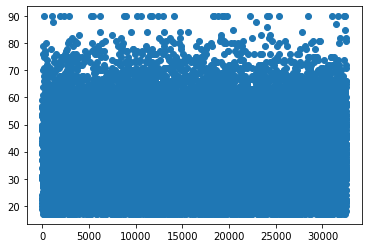

In [ ]:
import matplotlib.pyplot as plt

numerics = ['age', 'Financial Weight', 'education-num', 'Capital Gain', 'Capital Loss', 'hours-per-week']

plt.scatter(census_df['id'], census_df['age']) ## Greater than 85

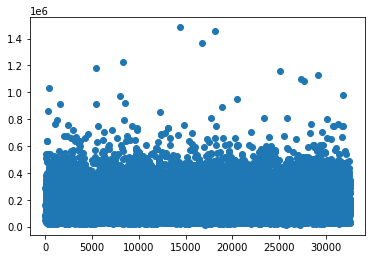

In [ ]:
plt.scatter(census_df['id'], census_df['Financial Weight']) ## Greater than 0.8

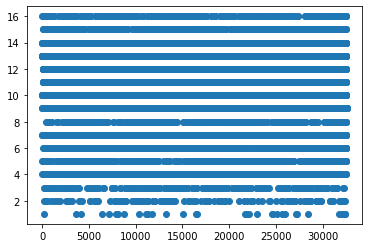

In [ ]:
plt.scatter(census_df['id'], census_df['education-num'])

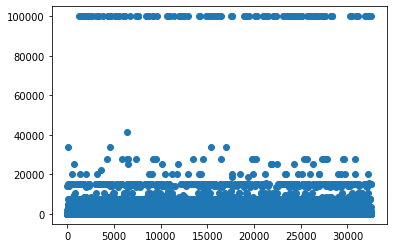

In [ ]:
plt.scatter(census_df['id'], census_df['Capital Gain'])

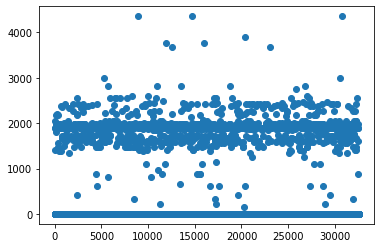

In [ ]:
plt.scatter(census_df['id'], census_df['Capital Loss']) ## Greater than 3000

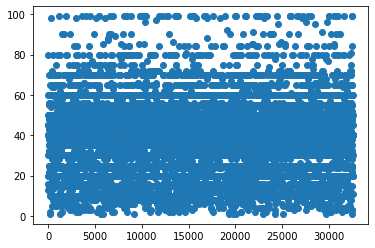

In [ ]:
plt.scatter(census_df['id'], census_df['hours-per-week'])

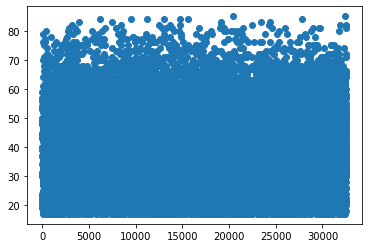

In [ ]:
census_df.drop(census_df[census_df['age'] > 85].index, inplace = True)
plt.scatter(census_df['id'], census_df['age']) ## Greater than 85

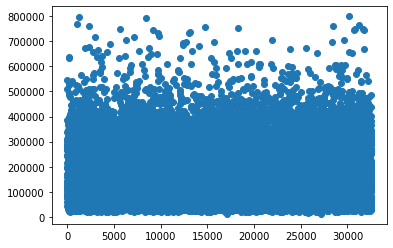

In [ ]:
census_df.drop(census_df[census_df['Financial Weight'] > 0.8 * 1e6].index, inplace = True)
plt.scatter(census_df['id'], census_df['Financial Weight']) ## Greater than 0.8

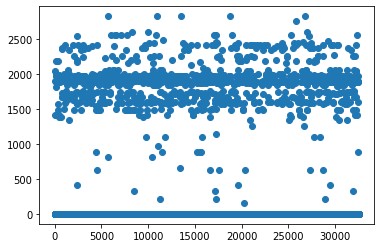

In [ ]:
census_df.drop(census_df[census_df['Capital Loss'] > 3000].index, inplace = True)
plt.scatter(census_df['id'], census_df['Capital Loss']) ## Greater than 3000

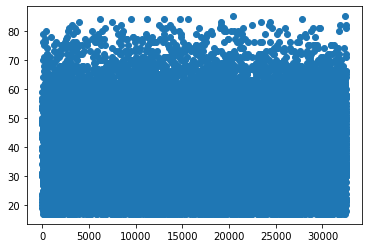

In [ ]:
plt.scatter(census_df['id'], census_df['age']) ## Greater than 85

In [ ]:
census_df.describe()

,age,Financial Weight,education-num,Capital Gain,Capital Loss,hours-per-week,id
count,22725.000000,22725.000000,22725.000000,22725.000000,22725.000000,22725.000000,22725.000000
mean,38.472123,189091.920220,10.077228,1054.358328,85.135006,40.454565,16329.792739
std,13.475501,102460.720232,2.581598,7232.151869,394.732487,12.311226,9394.799634
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,117760.000000,9.000000,0.000000,0.000000,40.000000,8252.000000
50%,37.000000,178564.000000,10.000000,0.000000,0.000000,40.000000,16343.000000
75%,47.000000,237608.000000,12.000000,0.000000,0.000000,45.000000,24475.000000
max,85.000000,799281.000000,16.000000,99999.000000,2824.000000,99.000000,32560.000000


In [ ]:
census_df['education'].value_counts()

HS-grad         7285
Some-college    5096
Bachelors       3733
Masters         1210
Assoc-voc        954
11th             830
Assoc-acdm       748
10th             649
7th-8th          456
Prof-school      412
9th              363
12th             310
Doctorate        284
5th-6th          237
1st-4th          125
Preschool         33
Name: education, dtype: int64

In [ ]:
census_df['Marriage Status'].value_counts()

Married Civilian             10495
No Marriage                   7439
Divorced                      3086
Separated                      715
Widowed                        681
Married but Spouse Absent      292
Married to Army Official        17
Name: Marriage Status, dtype: int64

In [ ]:
census_df['Relationship Status'].value_counts()

Husband           9219
Not-in-family     5808
Own-child         3526
Unmarried         2405
Wife              1120
Other-relative     647
Name: Relationship Status, dtype: int64

In [ ]:
census_df['Skin Color'].value_counts()

White                 19411
Black                  2201
Asian-Pac-Islander      724
Amer-Indian-Eskimo      200
Other                   189
Name: Skin Color, dtype: int64

In [ ]:
census_df = census_df.drop(['Skin Color'], axis = 1)

In [ ]:
non_numerics = ['education', 'Marriage Status', 'occupation', 'Relationship Status']

def one_hot_encoding(column_names, df):
    for col in column_names:
        one_hot = pd.get_dummies(df[col])
        df = df.join(one_hot, how = 'left', lsuffix = '_left', rsuffix = '_right')
        df = df.drop([col], axis = 1)
    return df

census_df = one_hot_encoding(non_numerics, census_df)

In [ ]:
census_df.head()

,age,Financial Weight,education-num,Gender,Capital Gain,Capital Loss,hours-per-week,id,Predictions,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married Civilian,Married but Spouse Absent,Married to Army Official,No Marriage,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,48,138970,13,Male,0,0,45,6900,Rich,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,21,96483,10,Female,0,0,12,27355,Poor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,49,228583,9,Male,0,0,40,12701,Poor,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,40,130760,11,Male,0,0,50,782,Rich,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,55,223716,10,Female,0,0,40,20462,Poor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder()
 
census_df['Gender']= label_encoder.fit_transform(census_df['Gender'])

census_df['Predictions']= label_encoder.fit_transform(census_df['Predictions'])
census_df.head()

,age,Financial Weight,education-num,Gender,Capital Gain,Capital Loss,hours-per-week,id,Predictions,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married Civilian,Married but Spouse Absent,Married to Army Official,No Marriage,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,48,138970,13,1,0,0,45,6900,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,21,96483,10,0,0,0,12,27355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,49,228583,9,1,0,0,40,12701,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,40,130760,11,1,0,0,50,782,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,55,223716,10,0,0,0,40,20462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

std_features = census_df.drop(['Predictions', 'id'], axis = 1)
std_labels = census_df['Predictions']

std_features = StandardScaler().fit_transform(std_features)
print(std_features)

[[ 0.7070673  -0.48919257  1.13218115 ... -0.42855035 -0.3440295
  -0.22768367]
 [-1.2966128  -0.90386792 -0.02991536 ...  2.33344812 -0.3440295
  -0.22768367]
 [ 0.78127768  0.38543501 -0.41728086 ... -0.42855035  2.90672745
  -0.22768367]
 ...
 [-0.40608831 -1.23132744 -0.41728086 ... -0.42855035 -0.3440295
  -0.22768367]
 [ 0.18759468 -0.32632657 -1.19201186 ... -0.42855035 -0.3440295
  -0.22768367]
 [-0.9997713  -1.40171843  1.13218115 ... -0.42855035 -0.3440295
  -0.22768367]]


In [ ]:
from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(std_features, std_labels, test_size=0.05, random_state=42)

In [ ]:
# print ("Test x length:", len(x_test))
# print ("Test y length:", len(y_test))
# print ("Train x length:", len(x_train))
# print ("Train y length:", len(y_train))

# TEST PREPROCESSING

In [ ]:
test_df = pd.read_csv(TEST_FILE);

In [ ]:
test_df = test_df.drop('Country', axis = 1)

In [ ]:
test_df = test_df.drop('Working Section', axis = 1)

In [ ]:
test_df = test_df.drop('Skin Color', axis = 1)

In [ ]:
non_numerics = ['education', 'Marriage Status', 'occupation', 'Relationship Status']

test_df = one_hot_encoding(non_numerics, test_df)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
 
test_df['Gender'] = label_encoder.fit_transform(test_df['Gender'])
test_df.head()

,age,Financial Weight,education-num,Gender,Capital Gain,Capital Loss,hours-per-week,id,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married Civilian,Married but Spouse Absent,Married to Army Official,No Marriage,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,33,180859,9,1,0,0,40,13102,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,28,163320,9,1,0,0,40,19586,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,39,116608,9,0,0,0,40,29215,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,31,288825,9,1,5013,0,40,23331,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,18,217743,7,0,0,0,40,31935,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

x_train = std_features
y_train = std_labels

logreg = LogisticRegression(max_iter = 300)

logreg.fit(x_train,y_train)

y_train_pred = logreg.predict(x_train)
# y_test_pred = logreg.predict(x_test)


In [ ]:
from sklearn import metrics
#print("Train Accuracy:",metrics.accuracy_score(y_normal_train, y_normal_train_pred))
#print("Test Accuracy:",metrics.accuracy_score(y_normal_test, y_normal_test_pred))

print("ROC score:", metrics.roc_auc_score(y_train, y_train_pred))
# print("ROC score:", metrics.roc_auc_score(y_test, y_test_pred))

ROC score: 0.7621245240257538


In [ ]:
from sklearn.svm import SVC

x_train = StandardScaler().fit_transform(x_train)

svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

y_svm_train_pred = svclassifier.predict(x_train)
print("SVM ROC Train Accuracy:", metrics.roc_auc_score(y_train, y_svm_train_pred))

SVM ROC Train Accuracy: 0.7578953567168896


In [ ]:
import seaborn as sns

corr = census_df.corr()['Predictions'].to_frame()

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

corr.style.background_gradient(cmap, axis = 1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_precision(2)\

,Predictions
age,0.24
Financial Weight,-0.01
education-num,0.33
Gender,0.22
Capital Gain,0.22
Capital Loss,0.16
hours-per-week,0.22
id,0.01
Predictions,1.00
10th,-0.07


In [ ]:
#age, Gender, Capital Gain, Capital Loss, education-num, hours-per-week

#Husband, Married Civilian, Exec-managerial

cols_you_need = ['age', 'Gender', 'Capital Gain', 'education-num', 'hours-per-week']
#removed capital loss
std_features = census_df[cols_you_need].copy()
std_features = StandardScaler().fit_transform(std_features)

In [ ]:
x_train = std_features
y_train = std_labels

logreg = LogisticRegression(max_iter = 500)

logreg.fit(x_train,y_train)

y_train_pred = logreg.predict(x_train)
# y_test_pred = logreg.predict(x_test)

In [ ]:
#print("Train Accuracy:",metrics.accuracy_score(y_normal_train, y_normal_train_pred))
#print("Test Accuracy:",metrics.accuracy_score(y_normal_test, y_normal_test_pred))

print("ROC score:", metrics.roc_auc_score(y_train, y_train_pred))
# print("ROC score:", metrics.roc_auc_score(y_test, y_test_pred))

ROC score: 0.6821210697086111


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

x_train = std_features

x_train = pca.fit_transform(x_train)


In [ ]:
pca.explained_variance_ratio_

array([0.27559111, 0.20789621, 0.1953087 , 0.17540183, 0.14580215])

In [ ]:
census_df

,age,Financial Weight,education-num,Gender,Capital Gain,Capital Loss,hours-per-week,id,Predictions,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married Civilian,Married but Spouse Absent,Married to Army Official,No Marriage,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,48,138970,13,1,0,0,45,6900,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,21,96483,10,0,0,0,12,27355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,49,228583,9,1,0,0,40,12701,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,40,130760,11,1,0,0,50,782,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,55,223716,10,0,0,0,40,20462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22787,33,123424,13,1,0,0,40,958,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
22788,38,218729,9,0,0,0,25,19469,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
22789,33,62932,9,1,0,0,40,27174,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
22790,41,155657,7,0,0,0,40,15888,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Tried to check which columns can be dropped based on corr and covar. Managed to improve logreg score

In [ ]:

# cols_to_drop = ['Unmarried','Own-child',  'Not-in-family', 'Tech-support','Protective-serv','Prof-specialty',  'Exec-managerial', 
#                 'Married but Spouse Absent', 'Divorced', 'Assoc-voc', 'Assoc-acdm', 'HS-grad',  'Widowed'] 
# cols_to_drop = ['Unmarried','Own-child',  'Not-in-family','Tech-support', 'Protective-serv', 'Prof-specialty', 'Handlers-cleaners'] ROC score: 0.7589440794409951
# cols_to_drop = ['Unmarried','Own-child',  'Not-in-family','Tech-support', 'Protective-serv', 'Prof-specialty', 'Machine-op-inspct'] ROC score: 0.758554251409927
# cols_to_drop = ['Wife', 'Unmarried', 'Own-child','Other-relative', 'Not-in-family', 'Transport-moving', 'Tech-support', 'Sales']  ROC score: 0.7607927985998456
# cols_to_drop = ['Wife', 'Unmarried', 'Own-child', 'Not-in-family', 'Tech-support', 'Protective-serv'] ROC score: 0.7611869508787463
# cols_to_drop = ['Wife', 'Unmarried', 'Own-child', 'Not-in-family', 'Tech-support', 'Protective-serv', 'Prof-specialty'] ROC score: 0.7614318345684415
# cols_to_drop = ['Wife', 'Unmarried', 'Own-child', 'Not-in-family','Tech-support', 'Protective-serv', 'Prof-specialty'] + ['Predictions'] ROC score: 0.7616723940103038
# cols_to_drop = ['Unmarried', 'Own-child', 'Not-in-family','Tech-support', 'Protective-serv', 'Prof-specialty'] + ['Predictions'] ROC score: 0.7623940723358907
# cols_to_drop = ['Unmarried','Own-child',  'Not-in-family', 'Tech-support','Protective-serv', 'Prof-specialty', 'Exec-managerial'] ROC score: 0.764038588550264
# cols_to_drop = ['Unmarried', 'Own-child',  'Not-in-family', 'Tech-support','Protective-serv','Prof-specialty',  'Exec-managerial', 'Married but Spouse Absent', 'Separated'] ROC score: 0.7641298794029205
# cols_to_drop = ['Unmarried','Own-child',  'Not-in-family', 'Tech-support','Protective-serv','Prof-specialty',  'Exec-managerial', 
                # 'Married but Spouse Absent', 'Separated', 'Divorced']  ROC score: 0.7644037519608903
cols_to_drop = ['Unmarried','Own-child',  'Not-in-family', 'Tech-support','Protective-serv','Prof-specialty', 'Exec-managerial', 
                'Married but Spouse Absent', 'Divorced', 'Assoc-voc', 'Assoc-acdm'] 

std_features = census_df.drop(['Predictions'] + cols_to_drop, axis = 1)
std_labels = census_df['Predictions']

std_features = StandardScaler().fit_transform(std_features)

from sklearn.linear_model import LogisticRegression

x_train = std_features
y_train = std_labels

logreg = LogisticRegression(max_iter = 300)

logreg.fit(x_train,y_train)

y_train_pred = logreg.predict(x_train)

print("ROC score:", metrics.roc_auc_score(y_train, y_train_pred))

ROC score: 0.7645240316818214


### Tried SVC

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

y_svm_train_pred = svclassifier.predict(x_train)
print("SVM ROC Train Accuracy:", metrics.roc_auc_score(y_train, y_svm_train_pred))

SVM ROC Train Accuracy: 0.7536570592641922


In [ ]:
census_df.head()

,age,Financial Weight,education-num,Gender,Capital Gain,Capital Loss,hours-per-week,id,Predictions,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,Divorced,Married Civilian,Married but Spouse Absent,Married to Army Official,No Marriage,Separated,Widowed,?,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,48,138970,13,1,0,0,45,6900,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,21,96483,10,0,0,0,12,27355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,49,228583,9,1,0,0,40,12701,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,40,130760,11,1,0,0,50,782,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,55,223716,10,0,0,0,40,20462,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
std_features = test_df.drop(cols_to_drop, axis = 1)
std_features = StandardScaler().fit_transform(std_features)

In [ ]:
y_pred = logreg.predict(std_features)

In [ ]:
test_df["Predictions"] = y_pred

In [ ]:
len(test_df)

9769

In [ ]:
len(test_df[test_df['Predictions'] == 0])

7831

In [ ]:
to_submit = test_df[["id", "Predictions"]]

In [ ]:
to_submit.to_csv("logreg_cols_removed_submission.csv", index=False)

### Tried SVC changing parameters 

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear', class_weight='balanced', probability=True, random_state = 20)
svclassifier.fit(x_train, y_train)

y_svm_train_pred = svclassifier.predict(x_train)
print("SVM ROC Train Accuracy:", metrics.roc_auc_score(y_train, y_svm_train_pred))

SVM ROC Train Accuracy: 0.8099949902239183


In [ ]:
x_train.shape

(22725, 41)

In [ ]:
svclassifier.fit_status_

0

### Tried with LinearSVC

In [ ]:
from sklearn.svm import LinearSVC

svcLinear = LinearSVC(max_iter = 1000000000, class_weight = 'balanced')
svcLinear.fit(x_train, y_train)

y_svclin_train_pred = svcLinear.predict(x_train)

print(y_svclin_train_pred)

print("SVM ROC Train Accuracy:", metrics.roc_auc_score(y_train, y_svclin_train_pred))

[1 0 0 ... 0 0 1]
SVM ROC Train Accuracy: 0.8224044700083297


### Tried Stacking LogReg, SVC and LinearSVC

In [ ]:
from sklearn.ensemble import StackingClassifier

models = [('logReg', LogisticRegression(max_iter = 300)), 
                    ('svc', SVC(kernel='linear', class_weight='balanced', probability=True, random_state = 20)),
                    ('svcLin', LinearSVC(max_iter = 1000000000, class_weight = 'balanced'))]

stacking = StackingClassifier(estimators=models)

stacking.fit(x_train, y_train)

print(metrics.roc_auc_score(y_train, stacking.predict(x_train)))

### Tried Stacking LogReg and LinearSVC

In [ ]:
# from sklearn.ensemble import StackingClassifier

# models = [('svc', SVC(kernel='linear', class_weight='balanced', probability=True, random_state = 20)),
#                     ('svcLin', LinearSVC(max_iter = 1000000000, class_weight = 'balanced'))]

# stacking_attempt2 = StackingClassifier(estimators=models)

# stacking_attempt2.fit(x_train, y_train)

# print(metrics.roc_auc_score(y_train, stacking_attempt2.predict(x_train)))

In [ ]:
print(x_train.shape, std_features.shape)

svclassifier.predict_proba(x_train)

In [ ]:
y_pred = [prob_1 for prob_0, prob_1 in svclassifier.predict_proba(std_features)]

### Submission code

In [ ]:
test_df.drop('Predictions', axis = 1)
test_df["Predictions"] = y_pred

In [ ]:
len(test_df)

In [ ]:
len(test_df[test_df['Predictions'] == 0])

In [ ]:
to_submit = test_df[["id", "Predictions"]]

In [ ]:
to_submit.to_csv("svreg_cols_removed_prob1_submission.csv", index=False)

In [ ]:

# cols_to_drop = ['Unmarried','Own-child',  'Not-in-family', 'Tech-support','Protective-serv','Prof-specialty',  'Exec-managerial', 
#                 'Married but Spouse Absent', 'Divorced', 'Assoc-voc', 'Assoc-acdm', 'HS-grad',  'Widowed'] 
# cols_to_drop = ['Unmarried','Own-child',  'Not-in-family','Tech-support', 'Protective-serv', 'Prof-specialty', 'Handlers-cleaners'] ROC score: 0.7589440794409951
# cols_to_drop = ['Unmarried','Own-child',  'Not-in-family','Tech-support', 'Protective-serv', 'Prof-specialty', 'Machine-op-inspct'] ROC score: 0.758554251409927
# cols_to_drop = ['Wife', 'Unmarried', 'Own-child','Other-relative', 'Not-in-family', 'Transport-moving', 'Tech-support', 'Sales']  ROC score: 0.7607927985998456
# cols_to_drop = ['Wife', 'Unmarried', 'Own-child', 'Not-in-family', 'Tech-support', 'Protective-serv'] ROC score: 0.7611869508787463
# cols_to_drop = ['Wife', 'Unmarried', 'Own-child', 'Not-in-family', 'Tech-support', 'Protective-serv', 'Prof-specialty'] ROC score: 0.7614318345684415
# cols_to_drop = ['Wife', 'Unmarried', 'Own-child', 'Not-in-family','Tech-support', 'Protective-serv', 'Prof-specialty'] + ['Predictions'] ROC score: 0.7616723940103038
# cols_to_drop = ['Unmarried', 'Own-child', 'Not-in-family','Tech-support', 'Protective-serv', 'Prof-specialty'] + ['Predictions'] ROC score: 0.7623940723358907
# cols_to_drop = ['Unmarried','Own-child',  'Not-in-family', 'Tech-support','Protective-serv', 'Prof-specialty', 'Exec-managerial'] ROC score: 0.764038588550264
# cols_to_drop = ['Unmarried', 'Own-child',  'Not-in-family', 'Tech-support','Protective-serv','Prof-specialty',  'Exec-managerial', 'Married but Spouse Absent', 'Separated'] ROC score: 0.7641298794029205
cols_to_drop = ['Unmarried','Own-child',  'Not-in-family', 'Tech-support','Protective-serv','Prof-specialty',  'Exec-managerial', 
                'Married but Spouse Absent', 'Separated', 'Divorced']  
# cols_to_drop = ['Unmarried','Own-child',  'Not-in-family', 'Tech-support','Protective-serv','Prof-specialty', 'Exec-managerial', 
#                 'Married but Spouse Absent', 'Divorced', 'Assoc-voc', 'Assoc-acdm'] 

std_features = census_df.drop(['Predictions'] + cols_to_drop, axis = 1)
std_labels = census_df['Predictions']

std_features = StandardScaler().fit_transform(std_features)

from sklearn.linear_model import LogisticRegression

x_train = std_features
y_train = std_labels

logreg = LogisticRegression(max_iter = 300)

logreg.fit(x_train,y_train)

y_train_pred = logreg.predict(x_train)

print("ROC score:", metrics.roc_auc_score(y_train, y_train_pred))

ROC score: 0.7644037519608903


In [ ]:
from sklearn.svm import LinearSVC

svcLinear = LinearSVC(max_iter = 1000000000, class_weight = 'balanced')
svcLinear.fit(x_train, y_train)

y_svclin_train_pred = svcLinear.predict(x_train)

print(y_svclin_train_pred)

print("SVM ROC Train Accuracy:", metrics.roc_auc_score(y_train, y_svclin_train_pred))

In [ ]:
print(x_train.shape, std_features.shape)

svclassifier.predict_proba(x_train)

In [ ]:
y_pred = [prob_1 for prob_0, prob_1 in svclassifier.predict_proba(std_features)]